<a href="https://colab.research.google.com/github/Naufalandaradika29/data/blob/main/UAS_Datmin_Naufal_Andaradika_0102522020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset dari URL (atau upload manual jika ingin)
df = pd.read_csv("heart.csv")

# Tampilkan 5 baris pertama
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Informasi umum dataset
df.info()

# Cek missing values
df.isnull().sum()

# Statistik ringkasan
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Cek Missing Values
print("Cek Missing Value")
missing = df.isnull().sum()
print(missing)

# Menampilkan hanya kolom yang punya missing value
print("Kolom dengan missing value:")
print(missing[missing > 0])



# Cek Duplikat Data
print("Cek Duplikat Data")
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Jika ingin melihat baris duplikat:
if duplicates > 0:
    print("Baris duplikat yang ditemukan:")
    print(df[df.duplicated()])


Cek Missing Value
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Kolom dengan missing value:
Series([], dtype: int64)
Cek Duplikat Data
Jumlah baris duplikat: 0


In [ ]:
# Jumlah data sebelum dihapus
print(f"Jumlah baris sebelum menghapus duplikat: {df.shape[0]}")

# Hapus duplikat
df = df.drop_duplicates()

# Jumlah data setelah dihapus
print(f"Jumlah baris setelah menghapus duplikat: {df.shape[0]}")


Jumlah baris sebelum menghapus duplikat: 303
Jumlah baris setelah menghapus duplikat: 302


In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data: 80% untuk pelatihan, 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Buat model Decision Tree
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Akurasi: 0.8032786885245902

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.88      0.72      0.79        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61


Confusion Matrix:
 [[26  3]
 [ 9 23]]


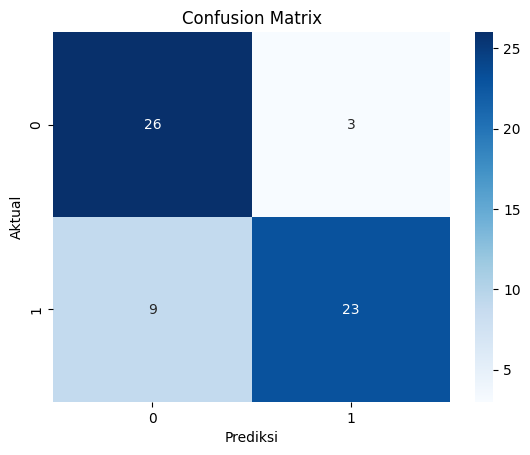

In [ ]:
# Prediksi data uji
y_pred = clf.predict(X_test)

# Akurasi model
print("Akurasi:", accuracy_score(y_test, y_pred))

# Laporan klasifikasi
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualisasi confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


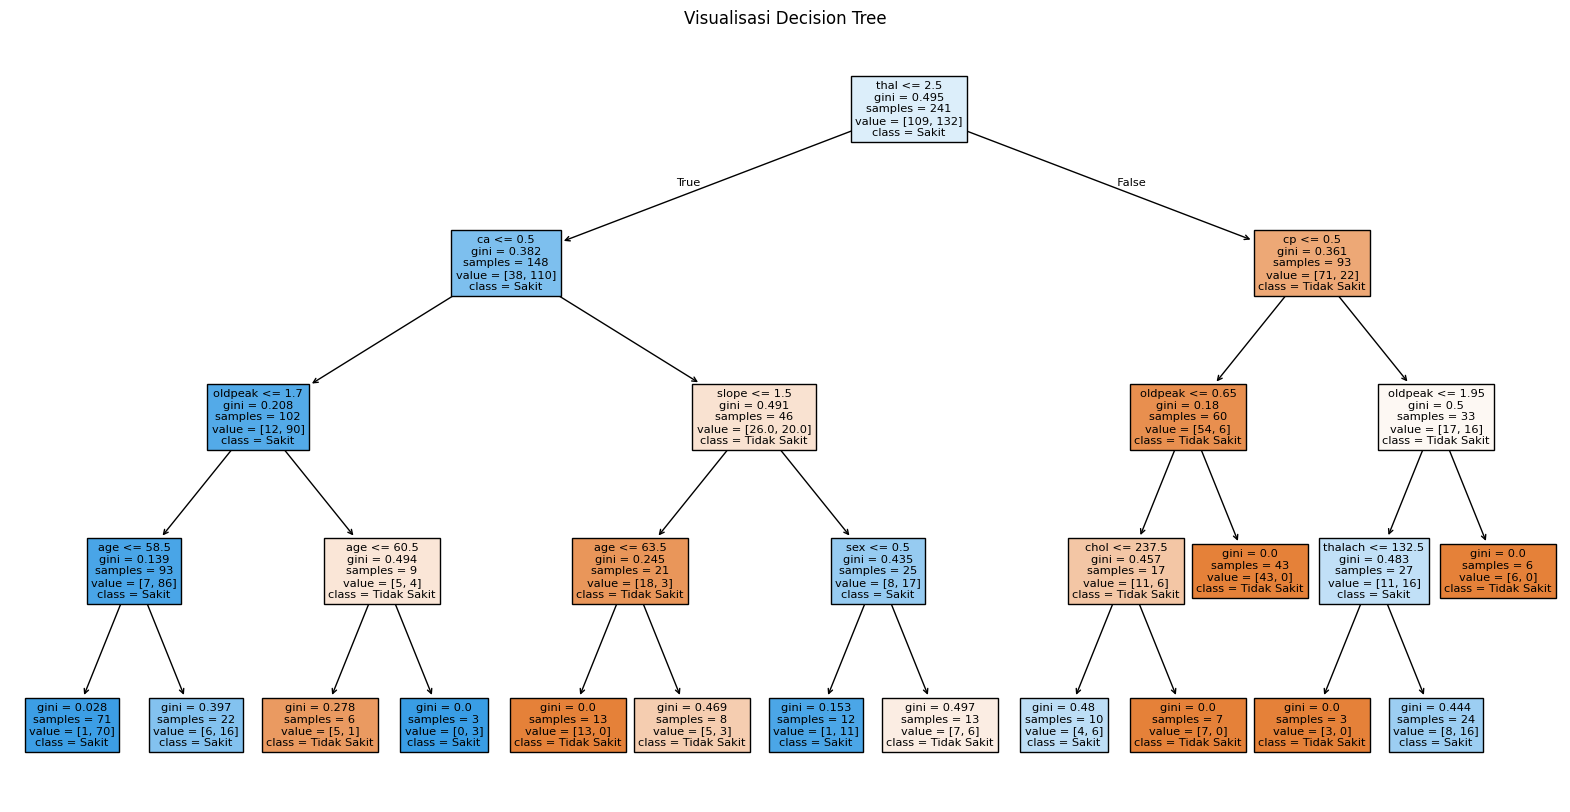

In [ ]:
# Visualisasi pohon keputusan
plt.figure(figsize=(20, 10))
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=["Tidak Sakit", "Sakit"]
)
plt.title("Visualisasi Decision Tree")
plt.show()


In [ ]:
# Hitung jumlah masing-masing kelas pada kolom target
jumlah_kelas = df['target'].value_counts()

# Tampilkan hasilnya
print("Jumlah Data per Kategori Target:")
print(jumlah_kelas)

# Jika ingin lebih jelas:
print("\nTidak Sakit Jantung (target=0):", jumlah_kelas[0])
print("Sakit Jantung (target=1):", jumlah_kelas[1])


Jumlah Data per Kategori Target:
target
1    164
0    138
Name: count, dtype: int64

Tidak Sakit Jantung (target=0): 138
Sakit Jantung (target=1): 164


/tmp/ipython-input-1883894478.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


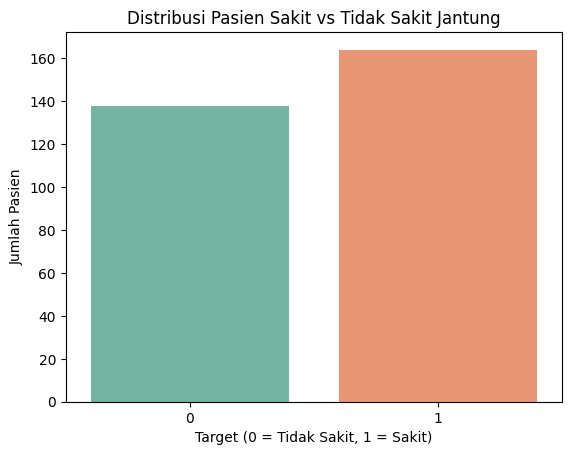

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribusi Pasien Sakit vs Tidak Sakit Jantung')
plt.xlabel('Target (0 = Tidak Sakit, 1 = Sakit)')
plt.ylabel('Jumlah Pasien')
plt.show()


**Kesimpulan**

Berdasarkan hasil analisis dan pemodelan terhadap dataset penyakit jantung, diketahui bahwa data terdiri dari beberapa fitur medis seperti usia, tekanan darah, kadar kolesterol, detak jantung maksimum, dan lainnya yang berkaitan dengan kondisi kesehatan jantung pasien. Setelah dilakukan pembersihan data dari duplikasi dan pengecekan terhadap nilai kosong, model Decision Tree dilatih menggunakan 80% data dan diuji pada 20% sisanya. Hasil evaluasi menunjukkan bahwa model mampu melakukan klasifikasi dengan tingkat akurasi yang baik, serta memberikan gambaran jelas melalui struktur pohon keputusan mengenai faktor-faktor yang paling berpengaruh terhadap kemungkinan seseorang menderita penyakit jantung. Berdasarkan distribusi kelas, jumlah pasien yang terdiagnosis penyakit jantung sedikit lebih banyak dibanding yang tidak. Hal ini menunjukkan pentingnya pendeteksian dini melalui fitur-fitur medis tersebut. Secara keseluruhan, model Decision Tree memberikan interpretasi yang mudah dipahami dan cukup efektif sebagai baseline untuk klasifikasi risiko penyakit jantung.